In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('weight-height.csv')

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.drop('Gender', axis=1, inplace=True)

In [7]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [8]:
df.count()

Height    10000
Weight    10000
dtype: int64

In [9]:
df.drop(df.index[:9980], inplace=True)

In [10]:
df.count()

Height    20
Weight    20
dtype: int64

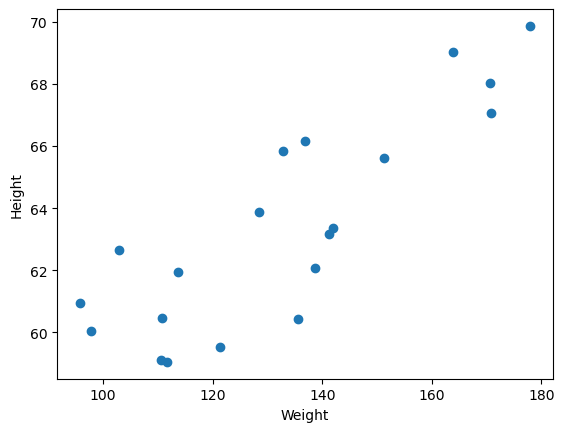

In [11]:
###scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [12]:
##correlation
df.corr()

,Height,Weight
Height,1.000000,0.849707
Weight,0.849707,1.000000


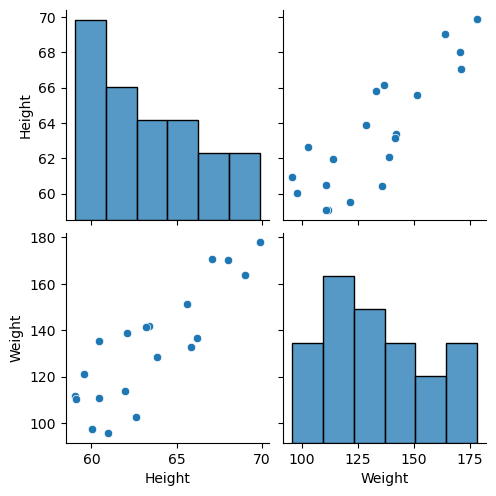

In [13]:
##seaborn
import seaborn as sns
sns.pairplot(df)
plt.show()

In [14]:
##independent and dependent feature
X =df[['Weight']] ### independent feature should be in 2D array or a dataframe
type(X)
np.array(X).shape

(20, 1)

In [15]:
Y=df['Height']  ### dependent feature can be in 1D array or a series

In [16]:
X_series = df['Weight']
np.array(X_series).shape

(20,)

In [17]:
 ##TRain test split
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [19]:
X_train.shape

(15, 1)

Standardization

##Mean = 0 SD =1 
#Zscore = (X - mean)/std deviation
always apply standardization to independent feature as only that is applied to gradient decent

In [20]:
from sklearn.preprocessing import StandardScaler


In [21]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[ 1.31113739],
       [-1.16912108],
       [-0.07034246],
       [ 1.0669354 ],
       [ 1.32410284],
       [-1.35849763],
       [ 1.58525549],
       [-1.43184006],
       [-0.77338547],
       [-0.84456424],
       [ 0.14460845],
       [ 0.60201104],
       [ 0.23897978],
       [-0.88773496],
       [ 0.26245551]])

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[-0.87899062],
       [-0.22989604],
       [ 0.07443804],
       [ 0.02978707],
       [-0.49494475]])

In [24]:
###Applying Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [25]:
regression = LinearRegression()

In [26]:
regression.fit(X_train, Y_train)

LinearRegression()

In [27]:
regression.coef_

array([0.11168611])

In [28]:
regression.intercept_

48.802232631776434

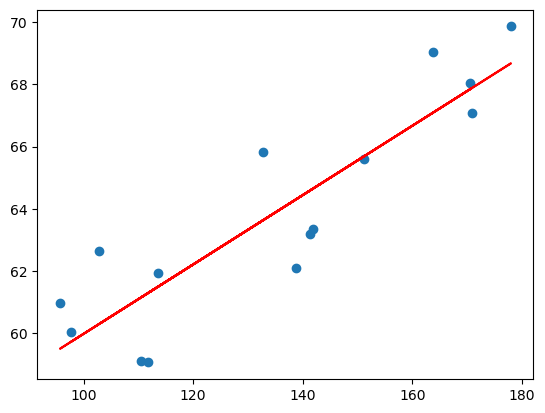

In [29]:
###plot Training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train, regression.predict(X_train), color='red')
plt.show()

In [30]:
###prediction for test data
##Predicted height = intercept + coef(weight)
#y =  48.802 + 0.111(X_test)
y_pred = regression.predict(X_test)

c:\Users\himan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
###Performance metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 183.9166501305939
Mean Absolute Error: 13.330244152317118
Root Mean Squared Error: 13.561587301293086


### R square


Formula
** R^2 = 1 - SSR/SST**
R^2 = coefficient of determination
SSR = sum of squares of residuals
SST = total sum of squares

In [33]:
from sklearn.metrics import r2_score
r2score=r2_score(Y_test, y_pred)
print("R2 score:", r2score)

R2 score: -28.03943678503018


Adjusted R^2 = 1-[(1-R^2)*(n-1)/(n-k-1)]
where: R^2: the R^2 of the model n: The number of observations k: The number of predictor variables

In [34]:
1-(1-r2score)*(len(Y_test)-X_test.shape[1]-1)

-86.11831035509054

In [35]:
1-(1-r2score)*(len(Y_test)-X_test.shape[1]-1)/(len(Y_test)-X_test.shape[1]-1)

-28.03943678503018

OLS LINEAR REGRESSION

In [36]:
import statsmodels.api as sm

In [37]:
model = sm.OLS(Y_train, X_train).fit()

In [38]:
model.predict(X_train)

9985    78.368921
9991    47.271853
9983    61.048156
9998    75.307157
9996    78.531480
9993    44.897481
9982    81.805768
9989    43.977926
9999    52.233520
9984    51.341093
9992    63.743175
9987    69.478013
9990    64.926387
9994    50.799825
9986    65.220722
dtype: float64

In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              581.1
Date:                Wed, 27 Aug 2025   Prob (F-statistic):                    8.45e-13
Time:                        23:54:03   Log-Likelihood:                         -55.532
No. Observations:                  15   AIC:                                      113.1
Df Residuals:                      14   BIC:                                      113.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\himan\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)
